In [247]:
import random
import time
import json
import pandas as pd
import matplotlib.pyplot as plt

In [248]:
df = pd.read_csv("temperaturi.csv")
df

,timestamp,temperatura
0,2025-12-11 16:40:17,20.0
1,2025-12-11 16:40:22,49.0
2,2025-12-11 16:40:27,22.0
3,2025-12-11 16:40:32,24.0
4,2025-12-11 16:40:37,24.0
5,2025-12-11 16:40:42,25.0
6,2025-12-11 16:40:47,26.0
7,2025-12-11 16:40:52,27.0
8,2025-12-11 16:40:57,28.0
9,2025-12-11 16:41:02,28.5


## 4 categorii

1. Analiza descriptiva (ce s-a întâmplat)

In [249]:
df.describe()

,temperatura
count,26.000000
mean,33.557692
std,7.866800
min,20.000000
25%,27.250000
50%,33.500000
75%,39.500000
max,49.000000


In [250]:
df['temperatura'].count()

np.int64(26)

In [251]:
df['temperatura'].mean()

np.float64(33.55769230769231)

In [252]:
df

,timestamp,temperatura
0,2025-12-11 16:40:17,20.0
1,2025-12-11 16:40:22,49.0
2,2025-12-11 16:40:27,22.0
3,2025-12-11 16:40:32,24.0
4,2025-12-11 16:40:37,24.0
5,2025-12-11 16:40:42,25.0
6,2025-12-11 16:40:47,26.0
7,2025-12-11 16:40:52,27.0
8,2025-12-11 16:40:57,28.0
9,2025-12-11 16:41:02,28.5


In [253]:
pd.to_datetime(df["timestamp"])

0    2025-12-11 16:40:17
1    2025-12-11 16:40:22
2    2025-12-11 16:40:27
3    2025-12-11 16:40:32
4    2025-12-11 16:40:37
5    2025-12-11 16:40:42
6    2025-12-11 16:40:47
7    2025-12-11 16:40:52
8    2025-12-11 16:40:57
9    2025-12-11 16:41:02
10   2025-12-11 16:41:07
11   2025-12-11 16:41:12
12   2025-12-11 16:41:17
13   2025-12-11 16:41:22
14   2025-12-11 16:41:27
15   2025-12-11 16:41:32
16   2025-12-11 16:41:37
17   2025-12-11 16:41:42
18   2025-12-11 16:41:47
19   2025-12-11 16:41:52
20   2025-12-11 16:41:57
21   2025-12-11 16:42:02
22   2025-12-11 16:42:07
23   2025-12-11 16:42:12
24   2025-12-11 16:42:17
25   2025-12-11 16:42:22
Name: timestamp, dtype: datetime64[ns]

2. Analiza dignostică (de ce s-a întâmplat)

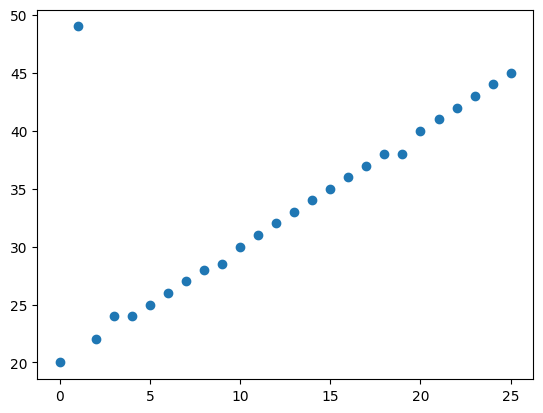

In [254]:
plt.scatter(df.index, df["temperatura"])

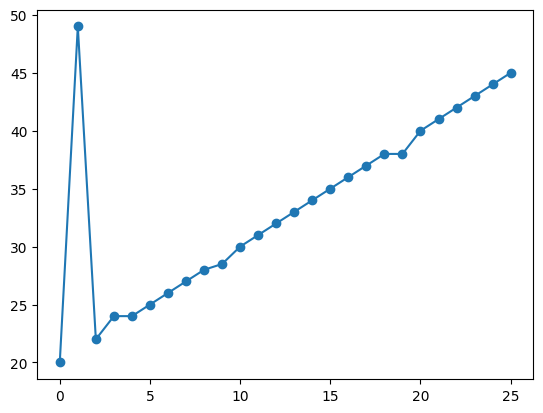

In [255]:
plt.scatter(df.index, df["temperatura"])
plt.plot(df.index, df["temperatura"])

In [256]:
df.describe()

,temperatura
count,26.000000
mean,33.557692
std,7.866800
min,20.000000
25%,27.250000
50%,33.500000
75%,39.500000
max,49.000000


In [257]:
Q1 = df["temperatura"].quantile(0.25)
Q3 = df["temperatura"].quantile(0.75)

D_DIFF = Q3 - Q1
D_DIFF

np.float64(12.25)

In [258]:
lower_bound = Q1 - 1.5 * D_DIFF
upper_bound = Q3 + 1.5 * D_DIFF



In [259]:
lower_anomalies = df[ df["temperatura"] < lower_bound ]
lower_anomalies

,timestamp,temperatura


In [260]:
upper_anomalies = df[ df["temperatura"] > upper_bound ]
upper_anomalies

,timestamp,temperatura


3. Analiza predictivă (Ce se va întâmpla?) - învățare automată

In [261]:



new_df = df[['temperatura']]
new_df = new_df[new_df['temperatura'] < 50]
new_df['T_minus_1'] =  new_df['temperatura'].shift(1)

new_df = new_df[['temperatura', 'T_minus_1']]
new_df = new_df.dropna()
new_df = new_df[ new_df["temperatura"] < 50 ]
new_df

,temperatura,T_minus_1
1,49.0,20.0
2,22.0,49.0
3,24.0,22.0
4,24.0,24.0
5,25.0,24.0
6,26.0,25.0
7,27.0,26.0
8,28.0,27.0
9,28.5,28.0
10,30.0,28.5


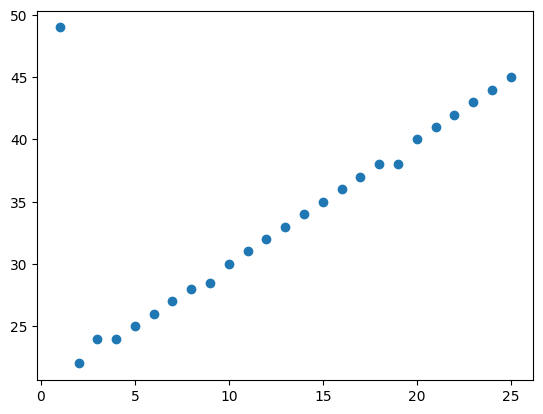

In [262]:
plt.scatter(new_df.index, new_df["temperatura"])

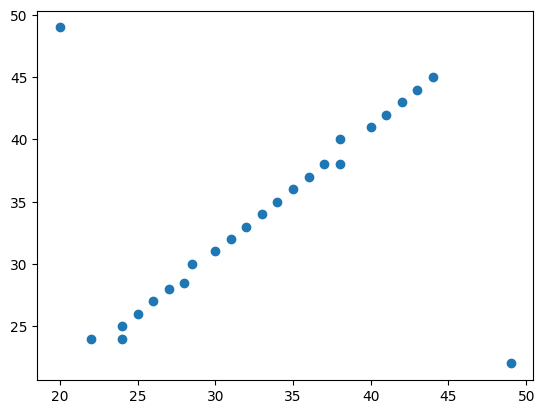

In [263]:
plt.scatter(new_df["T_minus_1"], new_df["temperatura"])

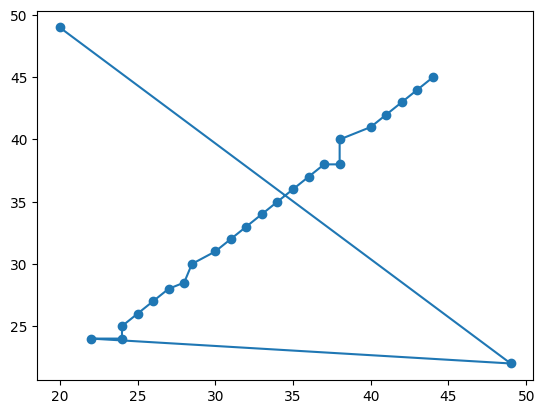

In [264]:
plt.scatter(new_df["T_minus_1"], new_df["temperatura"])
plt.plot(new_df["T_minus_1"], new_df["temperatura"])

In [265]:
x  = new_df["T_minus_1"].to_numpy()
y = new_df["temperatura"].to_numpy()

In [266]:
from scipy import stats

In [267]:
stats.linregress(x, y)

LinregressResult(slope=np.float64(0.42328136073706585), intercept=np.float64(20.08938695960312), rvalue=np.float64(0.4317802831368768), pvalue=np.float64(0.031138573155302402), stderr=np.float64(0.18437360964274724), intercept_stderr=np.float64(6.257983625726627))

In [268]:
prezicere = x * 0.9986255537055071 +1.0439547924978783

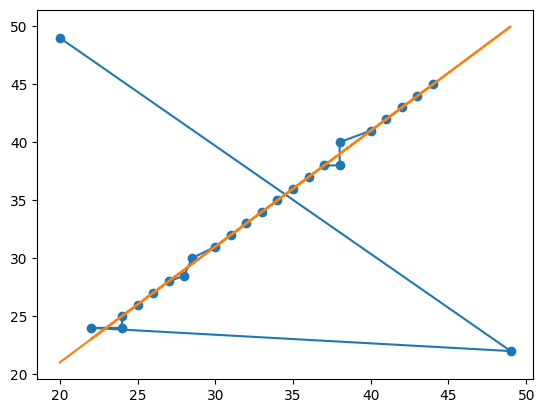

In [269]:
plt.scatter(new_df["T_minus_1"], new_df["temperatura"])
plt.plot(new_df["T_minus_1"], new_df["temperatura"])
plt.plot(x, prezicere)

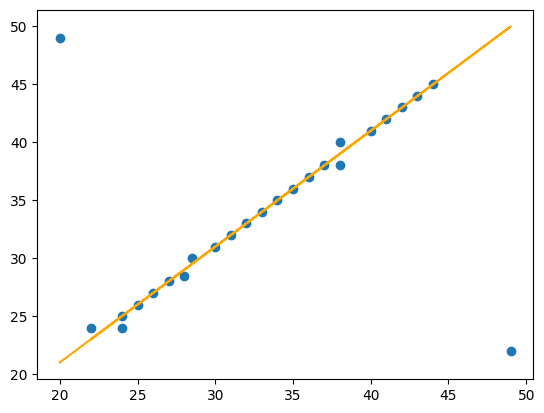

In [271]:
plt.scatter(new_df["T_minus_1"], new_df["temperatura"])
# plt.plot(new_df["T_minus_1"], new_df["temperatura"])
plt.plot(x, prezicere, c="orange")

4. Analiza prescriptivă - Ce ar trebui să facem?